In [3]:
%run helper.ipynb

In [4]:
all_data="/Users/lohith/Desktop/NEU_Courses/ThirdSemester/CS6510-ASD/data/TheGovernmentFinanceDatabase_AllData/all.csv"
ignore=set(['YearofData','IDChanged','FIPS_Place','YearPop','SchLevCode','FunctionCode'])

In [5]:
data = pd.read_csv(all_data)

In [6]:
data.head()

,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,16,2016,NaN,10000000,NaN,1,0,0,ALABAMA,1.0,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
1,16,2016,NaN,11002002,NaN,1,1,2,BALDWIN COUNTY,1.0,...,0,0,0,0,0,0,95519,14789,0,80730
2,16,2016,NaN,11005005,NaN,1,1,5,BLOUNT COUNTY,1.0,...,0,0,0,0,0,0,11092,0,0,11092
3,16,2016,NaN,11008008,NaN,1,1,8,CALHOUN COUNTY,1.0,...,0,0,0,0,0,0,27871,0,0,27871
4,16,2016,NaN,11010010,NaN,1,1,10,CHEROKEE COUNTY,1.0,...,0,0,0,0,0,0,4074,340,0,3734


** Name **

In [16]:
name_na = data.loc[data["Name"] == "NOT AVAILABLE"]

In [18]:
len(name_na)

6059

In [85]:
name_na.head()

,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
1227119,84,1984,NaN,275000000,0.0,27,5,0,NOT AVAILABLE,30.0,...,0,0,0,0,0,0,0,0,0,0
1227138,84,1984,NaN,275014005,0.0,27,5,14,NOT AVAILABLE,30.0,...,0,0,0,0,0,0,203,1,3,199
1227208,84,1984,NaN,275048407,0.0,27,5,48,NOT AVAILABLE,30.0,...,0,0,0,0,0,0,141,0,11,130
1238517,84,1984,NaN,365000000,0.0,36,5,0,NOT AVAILABLE,39.0,...,0,0,0,0,0,0,0,0,0,0
1248292,84,1984,NaN,445000000,0.0,44,5,0,NOT AVAILABLE,48.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
ids = name_na['ID'].unique()

In [84]:
len(ids),len(name_na)

(3768, 6059)

In [56]:
name_na['Type_Code'].value_counts()

4    3453
5    2452
2     100
3      54
Name: Type_Code, dtype: int64

In [73]:
na_ids = data.loc[(data['ID'].isin(ids))]

In [75]:
len(na_ids)

6512

In [74]:
len(na_ids['Name'].unique())

371

In [77]:
na_ids = na_ids.dropna(subset=['Population'])

In [78]:
m = na_ids.groupby('ID')['Name'].unique().to_dict()

In [79]:
m

{22026002: array(['NOT AVAILABLE'], dtype=object),
 22028001: array(['NOT AVAILABLE'], dtype=object),
 22032801: array(['NOT AVAILABLE'], dtype=object),
 22032803: array(['NOT AVAILABLE'], dtype=object),
 22035005: array(['NOT AVAILABLE'], dtype=object),
 22035710: array(['NOT AVAILABLE', 'CITY OF METLAKATLA'], dtype=object),
 42044701: array(['NOT AVAILABLE', 'HINDSVILLE TOWN'], dtype=object),
 102003501: array(['NOT AVAILABLE'], dtype=object),
 112035002: array(['NOT AVAILABLE'], dtype=object),
 112078007: array(['NOT AVAILABLE'], dtype=object),
 112102801: array(['NOT AVAILABLE'], dtype=object),
 112102802: array(['NOT AVAILABLE'], dtype=object),
 173013002: array(['NOT AVAILABLE'], dtype=object),
 173013003: array(['NOT AVAILABLE'], dtype=object),
 173013009: array(['NOT AVAILABLE'], dtype=object),
 173026004: array(['NOT AVAILABLE'], dtype=object),
 173026009: array(['NOT AVAILABLE'], dtype=object),
 173026012: array(['NOT AVAILABLE', 'SMOKY HILL TOWNSHIP'], dtype=object),
 173026

In [96]:
data.loc[(data['ID'] == 22035710)][['ID','Name','Population','Type_Code','Year4','County']]

,ID,Name,Population,Type_Code,Year4,County
1609006,22035710,NOT AVAILABLE,1050.0,2,1976,35
1624978,22035710,NOT AVAILABLE,1050.0,2,1975,35
1640935,22035710,CITY OF METLAKATLA,1050.0,2,1974,35
1656885,22035710,CITY OF METLAKATLA,1050.0,2,1973,35
1673703,22035710,NOT AVAILABLE,1050.0,2,1972,35
1751298,22035710,NOT AVAILABLE,1050.0,2,1971,35
1767476,22035710,NOT AVAILABLE,1050.0,2,1970,35
1783655,22035710,NOT AVAILABLE,798.0,2,1967,35


We can replace NOT AVAILABLE(ID = 22035710) with CITY OF METLAKATLA

In [111]:
data.loc[(data['ID'] == 233082015)][['ID','Name','Population','Type_Code','Year4','County']]

,ID,Name,Population,Type_Code,Year4,County
1663133,233082015,NOT AVAILABLE,49658.0,3,1973,82
1757549,233082015,NOT AVAILABLE,49658.0,3,1971,82
1773727,233082015,NOT AVAILABLE,49658.0,3,1970,82
1789813,233082015,NOT AVAILABLE,49658.0,3,1967,82


While most are special and school district records, 179 are general purpose governments,
the largest of which is a township of nearly 50,000 population (ID = 233082015)

In [104]:
data['County'].isna().any()

False

County = substr(ID, 6,3)

Eg:

233**082**015 =>  **082**
    
442**212**005 =>  **212**
    

In [69]:
features = data.keys().to_list()

In [ ]:
print(i if i )

In [120]:
before87 = data.loc[data['Year4'] < 1987]

In [128]:
after87 = data.loc[data['Year4'] > 1987]

In [130]:
year87 = data.loc[data['Year4'] == 1987]

In [125]:
len(before87)

707448

In [137]:
get_features(features,"surv")

['SurveyYr']

In [149]:
data.groupby('YearPop')['SurveyYr'].unique()

YearPop
0.0       [16, 15, 14, 13, 11, 10, 9, 8, 7, 3, 2, 1, 0, ...
1.0                                      [6, 5, 4, 3, 2, 1]
2.0                                      [7, 6, 5, 4, 3, 2]
3.0                                                  [4, 3]
4.0                                               [6, 5, 4]
5.0                                 [11, 10, 9, 8, 7, 6, 5]
6.0                       [16, 15, 14, 13, 11, 10, 9, 8, 7]
7.0                                      [12, 11, 10, 9, 8]
9.0                                                [12, 11]
10.0                                   [16, 15, 14, 13, 12]
11.0                                            [13, 12, 7]
12.0                                           [14, 13, 12]
13.0                                       [15, 14, 13, 12]
14.0                                                   [12]
16.0                                   [16, 15, 14, 13, 12]
70.0                                           [73, 72, 71]
73.0                            

In [152]:
data.loc[data['YearPop'] == 8030.0 ][['Name','Year4','Population','YearPop']]

,Name,Year4,Population,YearPop
1785438,PINE LAKE COMMUNITY CLUB,1967,NaN,8030.0


In [162]:
data['SurveyYr'].isna().any()

False

YearPop is a reference year for each survey year.
Foe example:
   For survey year 1992, reference for population data was 1990.


In [166]:
data.loc[data['SurveyYr'] == 92][['Name','Year4','Population','YearPop']].head()

,Name,Year4,Population,YearPop
786368,ALABAMA STATE GOVT,1992,4040389.0,90.0
786369,AUTAUGA COUNTY,1992,34222.0,90.0
786370,BALDWIN COUNTY,1992,98280.0,90.0
786371,BARBOUR COUNTY,1992,25417.0,90.0
786372,BIBB COUNTY,1992,16576.0,90.0


In [172]:
data.loc[(data['Name'] == 'ALABAMA STATE GOVT') & (data['SurveyYr'] == 90)][['Name','Year4','YearofData','Population','YearPop']]

,Name,Year4,YearofData,Population,YearPop
903579,ALABAMA STATE GOVT,1990,90.0,4023844.0,88.0


In [171]:
get_features(features,"year")

['Year4', 'YearofData', 'YearPop', 'ST_Debt_End_of_Year']

In [174]:
len(data.loc[data['YearofData'] != data['YearPop']])

1765347

In [177]:
data['SchLevCode'].isna().sum()

1443877

In [179]:
1443877/len(data)

0.8024053092191109

In [181]:
data.loc[(data['Type_Code'] == 5)]['SchLevCode'].isna().sum()

200601

In [182]:
sd=data.loc[(data['Type_Code'] == 5)]

In [185]:
sd_na_len = sd['SchLevCode'].isna().sum()

In [186]:
sd_na_len/len(sd)

0.3607620205449889

In [187]:
len(sd)

556048

In [188]:
len(sd)/len(data)

0.30901237943444504

In [189]:
sd['SchLevCode'].unique()

array([ 3.,  1.,  2.,  5.,  4.,  6.,  7., nan, 95., 94.])

In [191]:
sd.loc[sd['SchLevCode'] == 95.0][['Name','Year4','YearofData','Population','YearPop','SchLevCode']]

,Name,Year4,YearofData,Population,YearPop,SchLevCode
740405,NEW HEIGHTS SCHOOL,1996,96.0,NaN,1231.0,95.0


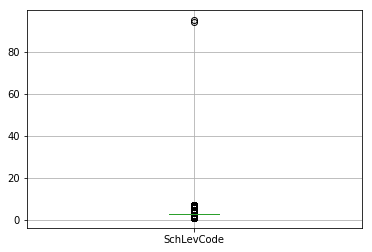

In [194]:
sd[['SchLevCode']].boxplot()

In [206]:
sd['SchLevCode'].value_counts()

3.0     254316
1.0      66732
2.0      10494
4.0       9766
7.0       7469
5.0       3428
6.0       3240
95.0         1
94.0         1
Name: SchLevCode, dtype: int64

In [207]:
sd['SchLevCode'].describe()

count    355447.000000
mean          2.753671
std           1.118579
min           1.000000
25%           3.000000
50%           3.000000
75%           3.000000
max          95.000000
Name: SchLevCode, dtype: float64

In [203]:
pandas_profiling.ProfileReport(sd[['SchLevCode']])

Number of variables,2
Number of observations,556048
Total Missing (%),18.0%
Total size in memory,8.5 MiB
Average record size in memory,16.0 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


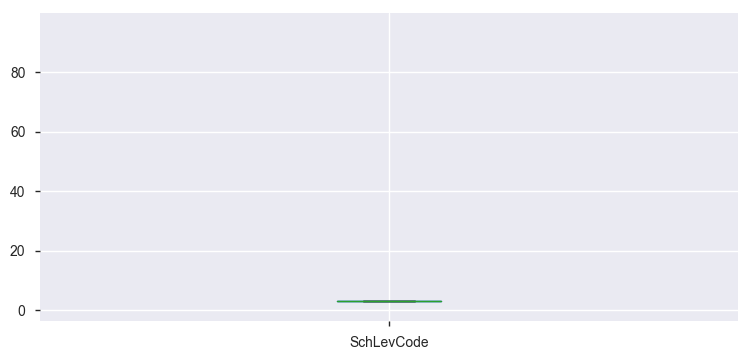

In [210]:
sd[['SchLevCode']].plot.box( figsize=(9,4))

In [213]:
data['FYEndDate'].isna().sum()/len(data)

0.04260112613063204

In [216]:
data['FYEndDate'].value_counts().to_dict()

{630.0: 663181,
 1231.0: 513580,
 0.0: 155359,
 930.0: 84208,
 831.0: 62452,
 331.0: 59453,
 430.0: 34594,
 228.0: 23985,
 531.0: 13779,
 12.0: 12073,
 731.0: 11241,
 100.0: 10305,
 1130.0: 6518,
 6.0: 6324,
 8600.0: 6165,
 1031.0: 5560,
 1.0: 5162,
 8610.0: 4537,
 131.0: 4489,
 301.0: 3096,
 323.0: 2181,
 315.0: 1948,
 9.0: 1714,
 330.0: 1714,
 309.0: 1535,
 8236.0: 1522,
 229.0: 1371,
 401.0: 1140,
 320.0: 1069,
 329.0: 1058,
 316.0: 1020,
 1069.0: 976,
 3.0: 873,
 322.0: 767,
 4.0: 758,
 321.0: 728,
 328.0: 708,
 302.0: 680,
 7.0: 652,
 325.0: 629,
 101.0: 455,
 318.0: 455,
 310.0: 438,
 308.0: 436,
 5.0: 420,
 110.0: 401,
 701.0: 338,
 326.0: 328,
 8601.0: 318,
 324.0: 314,
 8602.0: 281,
 314.0: 273,
 312.0: 258,
 317.0: 257,
 8030.0: 245,
 319.0: 241,
 303.0: 236,
 8603.0: 232,
 8604.0: 218,
 1230.0: 210,
 327.0: 209,
 8605.0: 206,
 311.0: 206,
 8.0: 203,
 10.0: 191,
 11.0: 189,
 2.0: 184,
 307.0: 177,
 8606.0: 170,
 8607.0: 140,
 313.0: 139,
 631.0: 129,
 304.0: 129,
 1001.0: 123

In [90]:
def info(df):
    return pandas_profiling.ProfileReport(df)

In [221]:
info(data[['Population']])

Number of variables,1
Number of observations,1799436
Total Missing (%),55.8%
Total size in memory,13.7 MiB
Average record size in memory,8.0 B
Numeric,1
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [223]:
data['Population'].isnull().any()

True

In [224]:
count_zeros(data,['Population'])

{'Population': 289}

In [228]:
count_nans(data,['Population'])

{'Population': 1004758}

In [8]:
nan_p = data.loc[data['Population'] != data['Population']]

In [11]:
len(nan_p)/len(data)

0.5583738460273108

In [10]:
nan_p['Type_Code'].value_counts()

5    556038
4    448716
2         3
3         1
Name: Type_Code, dtype: int64

In [17]:
township_ = nan_p.loc[nan_p['Type_Code'] == 3]

In [18]:
len(township_)

1

In [19]:
township_.head()

,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
315161,7,2007,NaN,173065003,NaN,17,3,65,RICHFIELD TOWNSHIP,20.0,...,0,0,0,0,0,0,73,0,0,73


In [37]:
data.loc[(data['Year4'] == 2007) & ((data['Name'] == "RICHFIELD TOWNSHIP") |(data['ID'] == 173065003) )][['Year4','Name','Type_Code','ID','Population']]

,Year4,Name,Type_Code,ID,Population
302954,2007,RICHFIELD TOWNSHIP,3,143001021,8781.0
315161,2007,RICHFIELD TOWNSHIP,3,173065003,8781.0
322220,2007,RICHFIELD TOWNSHIP,3,233025016,8781.0
322904,2007,RICHFIELD TOWNSHIP,3,233072010,8781.0
347454,2007,RICHFIELD TOWNSHIP,3,363035011,8781.0
347649,2007,RICHFIELD TOWNSHIP,3,363048007,8781.0
348076,2007,RICHFIELD TOWNSHIP,3,363077012,8781.0
359998,2007,RICHFIELD TOWNSHIP,3,423058030,8781.0


In [34]:
data.loc[(data['Year4'] == 2006) & ((data['Name'] == "RICHFIELD TOWNSHIP") |(data['ID'] == 173065003) )][['Year4','Name','Type_Code','ID','Population']]

,Year4,Name,Type_Code,ID,Population
383940,2006,RICHFIELD TOWNSHIP,3,233025016,8762.0


** Missing value of RICHFIELD TOWNSHIP is most likely 8781 , also need to replace population of other instances of RICHFIELD TOWNSHIP for the year 2007 **

In [36]:
data.loc[(data['Year4'] == 2007)&(data['Name'] == 'RICHFIELD TOWNSHIP'), ['Population']] =  8781.00

In [247]:
data.loc[(data['Year4'] == 2013) & (data['ID'] == 10000000 ) ][['Year4','Name','ID','Type_Code','Population']]

,Year4,Name,ID,Type_Code,Population
72925,2013,ALABAMA,10000000,0,4858979.0


In [38]:
city_ = nan_p.loc[nan_p['Type_Code'] == 2]

In [39]:
city_

,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
362391,7,2007,NaN,442093101,NaN,44,2,93,BEDIAS CITY,48.0,...,0,0,0,0,0,0,78,0,0,78
362941,7,2007,NaN,442214101,NaN,44,2,214,ESCOBARES CITY,48.0,...,0,0,0,0,0,0,13,0,0,13
366652,7,2007,NaN,452026101,NaN,45,2,26,DANIEL TOWN,49.0,...,0,0,0,0,0,0,14,14,0,0


In [52]:
data.loc[(data['Name'] == "BEDIAS CITY")][['Year4','Name','Type_Code','ID','Population']]

,Year4,Name,Type_Code,ID,Population
174806,2012,BEDIAS CITY,2,442093101,455.0
282048,2008,BEDIAS CITY,2,442093101,435.0
362391,2007,BEDIAS CITY,2,442093101,NaN


In [55]:
data.loc[(data['Name'] == "ESCOBARES CITY")][['Year4','Name','Type_Code','ID','Population']]

,Year4,Name,Type_Code,ID,Population
175358,2012,ESCOBARES CITY,2,442214101,2451.0
282087,2008,ESCOBARES CITY,2,442214101,1304.0
362941,2007,ESCOBARES CITY,2,442214101,NaN


In [56]:
data.loc[(data['Name'] == "DANIEL TOWN")][['Year4','Name','Type_Code','ID','Population']]

,Year4,Name,Type_Code,ID,Population
179472,2012,DANIEL TOWN,2,452026101,1058.0
283611,2008,DANIEL TOWN,2,452026101,592.0
366652,2007,DANIEL TOWN,2,452026101,NaN


In [57]:
sp_dist = nan_p.loc[nan_p['Type_Code'] == 4]

In [60]:
len(sp_dist['ID'].unique())

56300

In [61]:
sp_dist['Year4'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973,
       1972, 1971, 1970, 1967])

In [61]:
STATE = 0
COUNTY = 1 
CITY = 2                                 
TOWNSHIP = 3 
SPECIAL_DIST = 4
SCHOOL_DIST = 5   
FED_GOVT = 6 


In [116]:
nan_population = data.loc[data['Population'] != data['Population']]
sp_level_df = nan_population.loc[nan_population['Type_Code'] == SPECIAL_DIST]

In [158]:
class CleanData():
    def __init__(self,df):
        self._df = data
        self.total_instances = len(data)
        self.total_features = len(data.keys())
#         self.nan_population = self._df.loc[self._df['Population'] != self._df['Population']]
#         self.sp_level_df = self.nan_population.loc[self.nan_population['Type_Code'] == SPECIAL_DIST]
        self.nan_population = nan_population
        self.sp_level_df = sp_level_df
        
    def fill_population(self):
        if not len(self.nan_population):
            print("No nan values found in feature 'Population'")
            return
        # City level

        # Township level

        # Special district level
        names = set()
        ids = set()
        missing_years = self.sp_level_df['Year4'].unique()
        for year in missing_years:
            year_data = self.sp_level_df.loc[self.sp_level_df['Year4'] == year]
            names.update(year_data['Name'].unique().tolist())
            ids.update(year_data['ID'].unique().tolist())
#             print("For year ", year)
#             print("Number of disctint names : ",len(names))
#             print("Number of disctint IDS : ",len(ids))
        print("Number of total distint names",len(names)) 
        print("Number of total distint ids",len(ids))    
        
        not_nan = self._df.loc[(self._df['Type_Code'] == SPECIAL_DIST) & (self._df['Population'] >= 0 ) & (self._df['Name'].isin(names))]
        
        return not_nan

In [159]:
clean = CleanData(data)

In [160]:
clean.total_features,clean.total_instances

(594, 1799436)

In [161]:
not_na = clean.fill_population()

Number of total distint names 102790
Number of total distint ids 56300


In [163]:
not_na[['Population','Name','Year4','ID','Type_Code']]

,Population,Name,Year4,ID,Type_Code
330209,1231.0,CONSOLIDATED PWSD ONE OF BARTON,2007,264006601,4
511079,1231.0,CONSOLIDATED PWSD ONE OF BARTON,2002,264006601,4
531719,630.0,MCINTOSH CO RURAL WATER,2002,374046201,4


In [62]:
all_sp = data.loc[data['Type_Code'] == SPECIAL_DIST]

In [168]:
t = data.loc[(data['Type_Code'] == SPECIAL_DIST) & (data['Population'] != data['Population'] )]

In [174]:
len(t),len(s)

(448716, 448725)

In [173]:
s = data.loc[(data['Type_Code'] == SPECIAL_DIST) ]

In [149]:
len(sp_level_df), 

448716

In [175]:
448716/448725

0.9999799431723215

In [135]:
nan_population.loc[nan_population['ID'] == 484013202]['Name'].unique()

array(['DOUGLAS-GRANT-LINCOLN-OKANOGAN COUNTY PUBLIC HOSPITAL DISTRICT 6',
       'DOUGLAS-GRANT-LINCOLN-OKANOGAN COUNTY PUBLIC HOSPITAL DIST 6',
       'GRANT COUNTY PUBLIC HOSPITAL DIST 6'], dtype=object)

In [177]:
data['FunctionCode'].isna().sum()

1351236

In [178]:
1351236 / len(data)

0.7509219555460711

In [181]:
info(data[['FunctionCode']])

Number of variables,1
Number of observations,1799436
Total Missing (%),75.1%
Total size in memory,13.7 MiB
Average record size in memory,8.0 B
Numeric,1
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [64]:
all_sp['FunctionCode'].isna().sum()

525

In [66]:
len(all_sp)/len(data)

0.24936980253812863

In [65]:
all_sp.head()

,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
95,16,2016,NaN,14002902,NaN,1,4,2,ORANGE BEACH WATER SEWER AND FIRE PROTECTION A...,1.0,...,0,0,0,0,0,0,23419,1181,0,22238
96,16,2016,NaN,14002908,NaN,1,4,2,BALDWIN COUNTY EASTERN SHORE HEALTH CARE AUTHO...,1.0,...,0,0,0,0,0,0,43391,0,0,43391
97,16,2016,NaN,14003401,NaN,1,4,3,SPECTRACARE HEALTH SYSTEMS,1.0,...,0,0,0,0,0,0,3287,0,0,3287
98,16,2016,NaN,14005404,NaN,1,4,5,BLOUNT COUNTY WATER AUTHORITY,1.0,...,0,0,0,0,0,0,9631,0,0,9631
99,16,2016,NaN,14007601,NaN,1,4,7,GEORGIANA CITY HOUSING AUTHORITY,1.0,...,0,0,0,0,0,0,220,0,0,220


In [14]:
imp = ['Population','Name','Year4','ID','Type_Code','Total_Revenue']

In [11]:
all_state = data.loc[(data['Type_Code'] == 0)]

In [12]:
all_state_ids = all_state['ID'].unique().tolist()

In [227]:
b4_77 = all_state.loc[(all_state['ID'] == 20000000 ) &(all_state['Year4']  <= 1977)]

In [3]:
b4_77[['Population','Name','Year4','ID','Type_Code','Total_Revenue']].head()

NameError: name 'b4_77' is not defined

In [ ]:
# all_state[imp].groupby(['ID','Year4']).plot.box()

In [28]:
all_state.head()

,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Mortgages,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec
0,16,2016,NaN,10000000,NaN,1,0,0,ALABAMA,1.0,...,1815,0,4143961,529107,529107,0,12913490,1464402,176157,11272931
314,16,2016,NaN,20000000,NaN,2,0,0,ALASKA,2.0,...,0,1145382,1867671,433220,433220,0,64944768,3662764,153822,61128182
388,16,2016,NaN,30000000,NaN,3,0,0,ARIZONA,4.0,...,0,6111807,1821970,322017,322017,0,18794165,5809405,429626,12555134
713,16,2016,NaN,40000000,NaN,4,0,0,ARKANSAS,5.0,...,4142,10936752,3783960,485792,485792,0,8608523,1664378,358939,6585206
1191,16,2016,NaN,50000000,NaN,5,0,0,CALIFORNIA,6.0,...,5927,17058534,103383571,-3088756,11711,-3100467,107409539,29880672,5039254,72489613


In [34]:
g=all_state[imp].sort_values(['ID','Year4'])

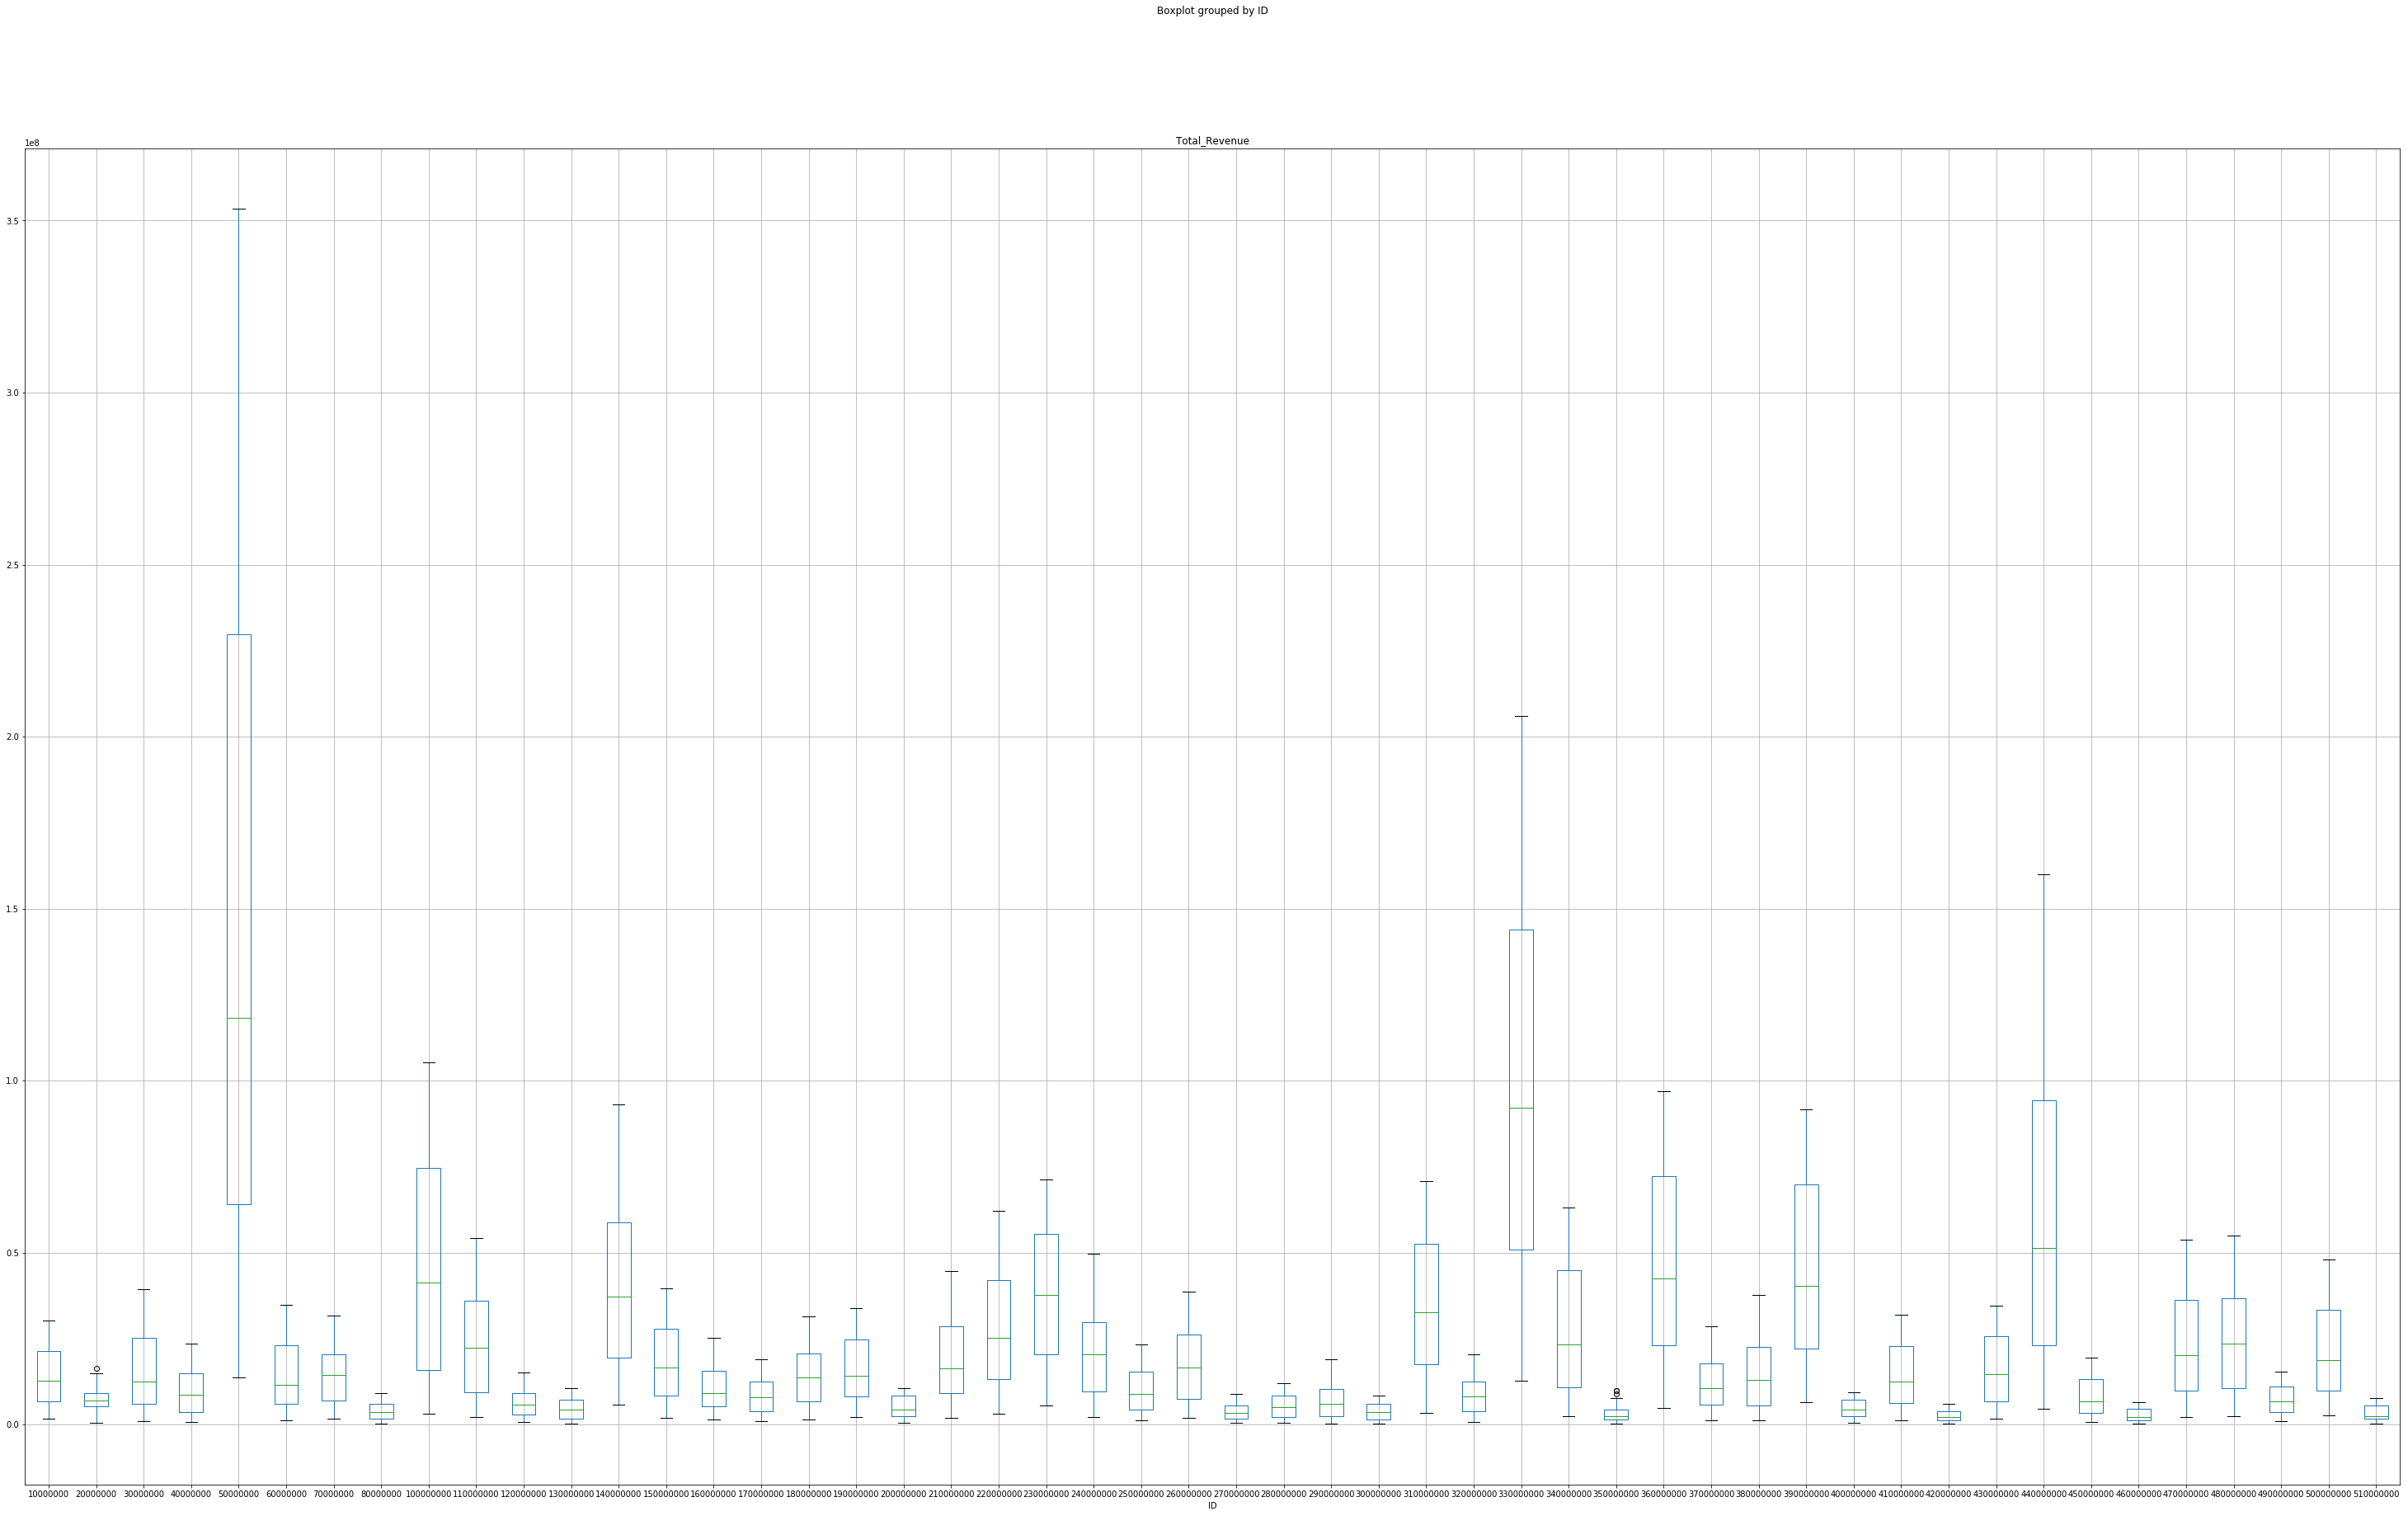

In [42]:
g.boxplot(by='ID',column=['Total_Revenue'], figsize = (50,30))

In [44]:
ol1 = all_state.loc[all_state['ID'] == 20000000]

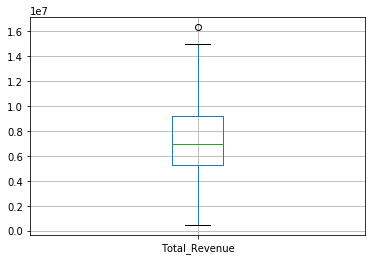

In [45]:
ol1.boxplot(column=['Total_Revenue'])

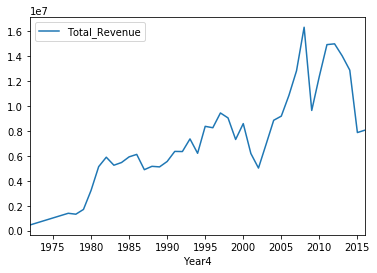

In [52]:
ol1.plot(x='Year4',y='Total_Revenue')

In [57]:
ol2 = all_state.loc[all_state['ID'] == 350000000]

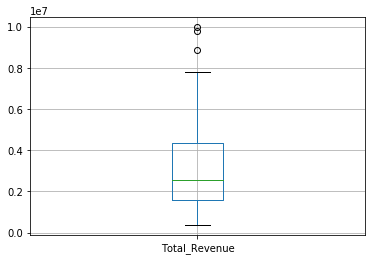

In [58]:
ol2.boxplot(column=['Total_Revenue'])

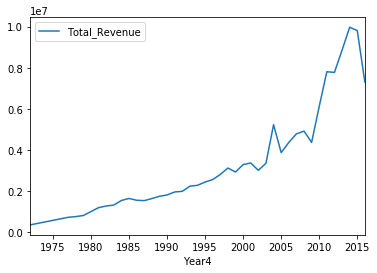

In [59]:
ol2.plot(x='Year4',y='Total_Revenue')

In [85]:
525/len(all_sp['FunctionCode'])

0.001169981614574628

In [77]:
all_sp.loc[all_sp['FunctionCode'] != all_sp['FunctionCode']][imp]

,Population,Name,Year4,ID,Type_Code,Total_Revenue
1341,NaN,CONTRA COSTA WATER AUTHORITY,2016,54007340,4,3844
3375,NaN,TOWN GREEN SPECIAL SERVICE DISTRICT,2016,74005101,4,1422
8478,NaN,EVANGELINE PARISH SOLID WASTE DISPOSAL DISTRICT,2016,194020401,4,3753
215154,NaN,RED,2010,64059906,4,0
232592,NaN,SPAN,2010,444061101,4,0
232678,NaN,METROPOLITAN TRANSIT AUTHORITY OF HARRIS COUNTY,2010,444101601,4,0
239605,NaN,RED,2009,64059906,4,0
243515,NaN,DUBUQUE,2009,164031301,4,94
248038,NaN,PLATTE CO,2009,264083103,4,0
257070,NaN,SPAN,2009,444061101,4,0


In [83]:
data.loc[data['Name'] == 'CONTRA COSTA WATER AUTHORITY'][['Population','FunctionCode','Year4','Type_Code','ID']]

,Population,FunctionCode,Year4,Type_Code,ID
1341,NaN,NaN,2016,4,54007340
25650,NaN,91.0,2015,4,54007340
49956,NaN,91.0,2014,4,54007340
74347,NaN,91.0,2013,4,54007340
101777,NaN,91.0,2012,4,54007340
189057,NaN,91.0,2011,4,54007340
213449,NaN,91.0,2010,4,54007340
237895,NaN,91.0,2009,4,54007340
262374,NaN,91.0,2008,4,54007340
290453,NaN,91.0,2007,4,54007340


**Enrollment**

In [86]:
all_schl = data.loc[data['Type_Code'] == 5]

In [88]:
len(all_schl)/len(data)

0.30901237943444504

In [91]:
info(data[['Enrollment']])

Number of variables,1
Number of observations,1799436
Total Missing (%),69.1%
Total size in memory,13.7 MiB
Average record size in memory,8.0 B
Numeric,1
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [93]:
missing(all_schl[['Enrollment']])

Number of variables,2
Number of observations,556048
Total Missing (%),0.0%
Total size in memory,8.5 MiB
Average record size in memory,16.0 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [98]:
info(data[['Total_Revenue']])

Number of variables,1
Number of observations,1799436
Total Missing (%),0.0%
Total size in memory,13.7 MiB
Average record size in memory,8.0 B
Numeric,1
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [102]:
revenue = get_features(features,"rev")

In [103]:
revenue

['Total_Revenue',
 'Total_Rev_Own_Sources',
 'General_Revenue',
 'Gen_Rev_Own_Sources',
 'Total_IG_Revenue',
 'Total_Fed_IG_Revenue',
 'Fed_IGR_Gen_Rev_Shar',
 'Total_State_IG_Revenue',
 'Tot_Local_IG_Rev',
 'Tot_Chgs_and_Misc_Rev',
 'Misc_General_Revenue',
 'Interest_Revenue',
 'Net_Lottery_Revenue',
 'Misc_General_Rev_NEC',
 'Liquor_Stores_Revenue',
 'Total_Utility_Revenue',
 'Water_Utility_Revenue',
 'Electric_Utility_Rev',
 'Gas_Utility_Rev',
 'Transit_Utility_Rev',
 'Total_Insur_Trust_Rev',
 'Tot_Ins_Trust_Inv_Rev',
 'Total_Emp_Ret_Rev',
 'Emp_Ret_Int_Rev',
 'Total_Unemp_Rev',
 'Unemp_Int_Revenue']

In [104]:
offline = info(data[revenue])

In [105]:
offline.to_file("revenue.html")

In [107]:
na = data.isna().any()

In [110]:
na=na.to_dict()

In [116]:
for i,j in na.items():
    if j:
        print(i,":",j)

YearofData : True
IDChanged : True
Name : True
FIPS_Code_State : True
FIPS_County : True
FIPS_Place : True
FYEndDate : True
YearPop : True
SchLevCode : True
Population : True
FunctionCode : True
Enrollment : True
Motor_Vehicle_License_Total : True
State_IGR_Gen_Sup : True
Chg_Total_Elem_Education : True
Chg_Highways : True
Prop_Sale_Total : True
Total_Other_Capital_Outlays : True
General_Capital_Outlay_Other : True
Air_Trans_Current_Exp : True
Misc_Com_Activ_Current_Exp : True
Correct_Current_Exp : True
Total_Educ_Current_Exp : True
Elem_Educ_Current_Exp : True
Higher_Ed_Current_Exp : True
Educ_NEC_Current_Exp : True
Emp_Sec_Adm_Current_Exp : True
Fin_Admin_Current_Exp : True
Fire_Prot_Current_Exp : True
Judicial_Current_Exp : True
Cen_Staff_Current_Exp : True
Gen_Pub_Bldg_Current_Exp : True
Health_Current_Exp : True
Total_Hospital_Current_Exp : True
Own_Hospital_Current_Exp : True
Hosp_Other_Current_Exp : True
Total_Highways_Current_Exp : True
Regular_Hwy_Current_Exp : True
Toll_Hwy_C

**Motor_Vehicle_License_Total**   =   Motor vehicle licenses +  Motor vehicle operator licenses
     

In [166]:
get_features(features, "motor")

['Motor_Fuels_Tax',
 'Motor_Vehicle_License',
 'Motor_Veh_Oper_License',
 'Motor_Vehicle_License_Total']

In [118]:
data['Motor_Vehicle_License_Total'].isna().sum()/len(data)

0.0129146021308899

In [16]:
data.head()

,SurveyYr,Year4,YearofData,ID,IDChanged,State_Code,Type_Code,County,Name,FIPS_Code_State,...,Emp_Retire_Sec_Misc_Inv,Emp_Retire_Sec_Oth_Nong,Unemp_Comp_Cash___Sec,Unemp_Comp_Bal_In_US_Trs,Unemp_Comp_Other_Balance,Nonin_Trust_Cash___Sec,Sinking_Fd_Cash___Sec,Bond_Fd_Cash___Sec,Oth_Nonin_Fd_Cash___Sec,temp_MVLT
0,16,2016,NaN,10000000,NaN,1,0,0,ALABAMA,1.0,...,0,4143961,529107,529107,0,12913490,1464402,176157,11272931,247514
1,16,2016,NaN,11002002,NaN,1,1,2,BALDWIN COUNTY,1.0,...,0,0,0,0,0,95519,14789,0,80730,0
2,16,2016,NaN,11005005,NaN,1,1,5,BLOUNT COUNTY,1.0,...,0,0,0,0,0,11092,0,0,11092,0
3,16,2016,NaN,11008008,NaN,1,1,8,CALHOUN COUNTY,1.0,...,0,0,0,0,0,27871,0,0,27871,0
4,16,2016,NaN,11010010,NaN,1,1,10,CHEROKEE COUNTY,1.0,...,0,0,0,0,0,4074,340,0,3734,78


In [19]:
missing_mvlt = data.loc[data['Motor_Vehicle_License_Total'] != data['Motor_Vehicle_License_Total']]

In [20]:
len(missing_mvlt)

0

In [122]:
missing_mvlt['Type_Code'].value_counts()

5    13464
4     4246
2     3089
1     1433
3     1007
Name: Type_Code, dtype: int64

In [6]:
old = data['Motor_Vehicle_License_Total'].unique().tolist()

In [7]:
# Fill using  Motor vehicle licenses + Motor vehicle operator licenses
data['temp_MVLT'] = data['Motor_Vehicle_License'] + data['Motor_Veh_Oper_License']                                                                                                                                                                                                                                                                       
del data['Motor_Vehicle_License_Total']                                                                                                                                  
data=data.rename(index=str, columns={"temp_MVLT": "Motor_Vehicle_License_Total"})                                                                                                                                   
                                                                                                                                                                                                                     

In [125]:
data_exclude_2016 = data.loc[data['Year4'] !=  2016]

In [126]:
na_excluding_2016 = data_exclude_2016.isna().any() 

In [130]:
l = []

In [131]:
for i,j in na_excluding_2016.items():
    if j:
        print(i,":",j)
        l.append(i)

YearofData : True
IDChanged : True
Name : True
FIPS_Code_State : True
FIPS_County : True
FIPS_Place : True
FYEndDate : True
YearPop : True
SchLevCode : True
Population : True
FunctionCode : True
Enrollment : True


In [132]:
 for i,j in na.items():
    if j and i not in l:
          

Motor_Vehicle_License_Total : True
State_IGR_Gen_Sup : True
Chg_Total_Elem_Education : True
Chg_Highways : True
Prop_Sale_Total : True
Total_Other_Capital_Outlays : True
General_Capital_Outlay_Other : True
Air_Trans_Current_Exp : True
Misc_Com_Activ_Current_Exp : True
Correct_Current_Exp : True
Total_Educ_Current_Exp : True
Elem_Educ_Current_Exp : True
Higher_Ed_Current_Exp : True
Educ_NEC_Current_Exp : True
Emp_Sec_Adm_Current_Exp : True
Fin_Admin_Current_Exp : True
Fire_Prot_Current_Exp : True
Judicial_Current_Exp : True
Cen_Staff_Current_Exp : True
Gen_Pub_Bldg_Current_Exp : True
Health_Current_Exp : True
Total_Hospital_Current_Exp : True
Own_Hospital_Current_Exp : True
Hosp_Other_Current_Exp : True
Total_Highways_Current_Exp : True
Regular_Hwy_Current_Exp : True
Toll_Hwy_Current_Exp : True
Hous___Com_Current_Exp : True
Libraries_Current_Exp : True
Natural_Res_Current_Exp : True
Parking_Current_Exp : True
Parks___Rec_Current_Exp : True
Police_Prot_Current_Exp : True
Prot_Insp_Curren

    State_IGR_Gen_Sup

In [135]:
total_instances = len(data)

In [161]:
def find_missing_years(data,feature):
    l = [feature,'Year4']
    
    df = data[l].loc[data[feature] != data[feature]]
    n = len(df)
    n100 = n *100
    yl = df['Year4'].unique().tolist()
    return "{}: {}({}%) missing values which are for years {}".format(feature , n,round(n100/total_instances,4),yl)
#     print("Count : {} Percentage : {} ".format(n, n/total_instances))
#     return 

In [148]:
find_missing_years(data,'State_IGR_Gen_Sup')

State_IGR_Gen_Sup : 18864 - 1.0483284762558935 %  missing values which are for years [2016]


[2016]

In [165]:
 for i,j in na.items():
    if j and i not in l:
        print(find_missing_years(data,i))
        

Motor_Vehicle_License_Total: 23239(1.2915%) missing values which are for years [2016]
State_IGR_Gen_Sup: 18864(1.0483%) missing values which are for years [2016]
Chg_Total_Elem_Education: 11075(0.6155%) missing values which are for years [2016]
Chg_Highways: 22803(1.2672%) missing values which are for years [2016]
Prop_Sale_Total: 17125(0.9517%) missing values which are for years [2016]
Total_Other_Capital_Outlays: 2900(0.1612%) missing values which are for years [2016]
General_Capital_Outlay_Other: 3573(0.1986%) missing values which are for years [2016]
Air_Trans_Current_Exp: 22734(1.2634%) missing values which are for years [2016]
Misc_Com_Activ_Current_Exp: 22944(1.2751%) missing values which are for years [2016]
Correct_Current_Exp: 22216(1.2346%) missing values which are for years [2016]
Total_Educ_Current_Exp: 9726(0.5405%) missing values which are for years [2016]
Elem_Educ_Current_Exp: 10185(0.566%) missing values which are for years [2016]
Higher_Ed_Current_Exp: 23595(1.3112%)

** State_IGR_Gen_Sup = State_IGR_Tax_Relief + State_IGR_Oth_Gen_Sup **

In [11]:
features = data.keys()

In [7]:
data['State_IGR_Gen_Sup'].isna().sum()

18864

In [8]:
def fill_missing(data,dest_feature, feature1, feature2):
    del data[dest_feature]                                                                                                                                
    data['temp'] = data[feature1] + data[feature2]  
    data.columns = data.columns.str.replace('temp',dest_feature)
#     data = data.rename(index=str, columns={"temp": dest_feature})  
    

In [9]:
fill_missing(data,"State_IGR_Gen_Sup","State_IGR_Tax_Relief","State_IGR_Oth_Gen_Sup")

In [10]:
data['State_IGR_Gen_Sup'].isna().sum()

0

** Chg_Total_Elem_Education' = 'Chg_Elem_Ed_Sch_Lunch', + 'Chg_Elem_Ed_Tuition' + 'Chg_Elem_Ed_NEC'**

In [13]:
get_features(features,"elem")

In [14]:
del data['Chg_Total_Elem_Education']                                                                                                                                
data['temp'] = data['Chg_Elem_Ed_Sch_Lunch'] + data['Chg_Elem_Ed_Tuition'] +  data['Chg_Elem_Ed_NEC']
data.columns = data.columns.str.replace('temp','Chg_Total_Elem_Education')

In [15]:
data['Chg_Total_Elem_Education'].isna().sum()

0